In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_ubyte
import cv2

In [2]:
# Tu można załadować dowolny obrazek
testImage = data.astronaut()

In [3]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [4]:
# Funkcja rysująca ramkę wokół obrazu
def createBorder(img, borderSize=1, color=0):
    if len(img.shape) > 2 :     # jeżeli funkcja dostanie kolorowy obrazek:
        channels = img.shape[2] # pobieram ilość kanałów "w obrazku"
    else:                       # w przeciwnym przypadku
        channels = 1            # zakładam, że obrazek jest w skali szarości (posiada tylko jeden kanał)
    
    img = img_as_ubyte(img)     # za pomocą wbudowanej w scikit funkcji zamieniam wartości luminancji na liczby całkowite 0-255
    
    if channels > 1:
        new_shape = (img.shape[0] + 2 * borderSize, img.shape[1] + 2 * borderSize, channels)
    else:
        new_shape = (img.shape[0] + 2 * borderSize, img.shape[1] + 2 * borderSize)
        
    arr = np.full(new_shape, color, dtype=img.dtype) # tworzę nową tablicę wypełnioną wartościami "color"
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for z in range(channels):
                if channels > 1:
                    arr[x+borderSize][y+borderSize][z] = img[x][y][z]
                else:
                    arr[x+borderSize][y+borderSize] = img[x][y]
    return arr

In [5]:
# Funkcja usuwająca ramkę wokół obrazu
def cropBorder(img, borderSize=1):
    if len(img.shape) > 2:
        return img[borderSize:img.shape[0] - borderSize, borderSize:img.shape[1] - borderSize, 0:img.shape[2]]
    else:
        return img[borderSize:img.shape[0] - borderSize, borderSize:img.shape[1] - borderSize]

In [6]:
# Implementacja podstawowego filtra dolnoprzepustowego
# Parametry: im - obraz na którym pracujemy, maskSize - promień maski
def myLowPassFilter(im, maskSize):
    if maskSize < 1 :
        raise ValueError("Błędna wielkość maski, nie może być ujemna!")
        
    img = im.copy()             # pracuję na kopii obrazka źródłowego
    
    if len(img.shape) > 2 :     # jeżeli funkcja dostanie kolorowy obrazek:
        channels = img.shape[2] # pobieram ilość kanałów "w obrazku"
    else:                       # w przeciwnym przypadku
        channels = 1            # zakładam, że obrazek jest w skali szarości (posiada tylko jeden kanał)
    img = createBorder(img, borderSize=maskSize)
    for x in range(maskSize, img.shape[0] - maskSize):
        for y in range(maskSize, img.shape[1] - maskSize):
            for z in range(channels):
                if channels > 1:
                    avg = np.mean(im[x-maskSize:x+maskSize, y-maskSize:y+maskSize, z])
                    img[x][y][z] = avg
                else:
                    avg = np.mean(im[x-maskSize:x+maskSize, y-maskSize:y+maskSize])
                    img[x][y] = avg
    
    return img

Test dodawania i usuwania ramki własną funkcją


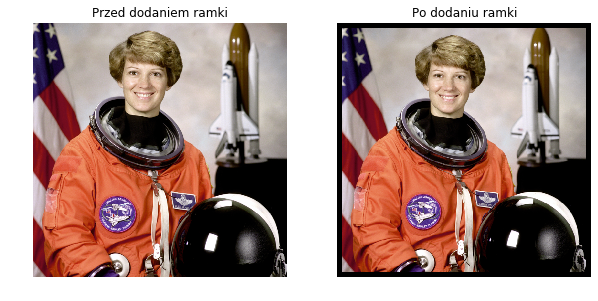

(512, 512, 3) (532, 532, 3)


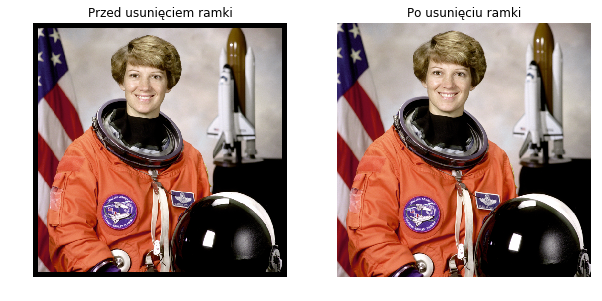

Test filtra dolnoprzepustowego
(514, 514, 3)


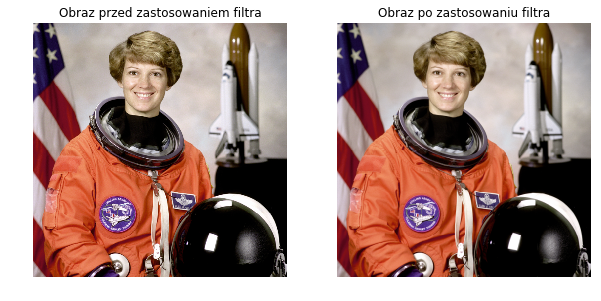

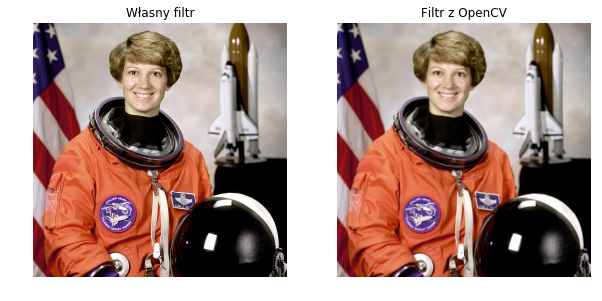

In [7]:
borderedImage = createBorder(testImage, borderSize=10)
print("Test dodawania i usuwania ramki własną funkcją");
show2imgs(testImage, borderedImage, title1="Przed dodaniem ramki", title2="Po dodaniu ramki")
print(testImage.shape, borderedImage.shape)
show2imgs(borderedImage, cropBorder(borderedImage, 10), title1="Przed usunięciem ramki", title2="Po usunięciu ramki")
print("Test filtra dolnoprzepustowego")
blurredImage = myLowPassFilter(testImage, maskSize=1)
print(blurredImage.shape)
show2imgs(testImage, blurredImage, title1="Obraz przed zastosowaniem filtra", title2="Obraz po zastosowaniu filtra")
show2imgs(blurredImage, cv2.blur(testImage, (3,3)), title1="Własny filtr", title2="Filtr z OpenCV")